# Phish Mail Identification using ML Classification tools

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Extracting Tar

In [ ]:
import tarfile

# Define the names of the archive files to read
archive_names = ["20021010_hard_ham.tar.bz2", "20030228_easy_ham_2.tar.bz2", "phishing_mails.tar.xz", "phishingMails.tar.bz2"]

# Loop over the archive files and extract the contents
for name in archive_names:
    with tarfile.open("tar/" + name, "r:*") as tar:
        print(f"Reading data from {name}...")
        tar.extractall()
        print("Done!")


# Data Content Show

In [3]:
import os

# Define the paths of the extracted files
paths = ["hard_ham/", "easy_ham_2/", "phishing_mails/", "phishingMails/"]

# Loop over the files in each directory and print a few data points
for path in paths:
    print(f"Data from directory {path}:")
    files = os.listdir(path)
    for i, file in enumerate(files[:3]):
        with open(os.path.join(path, file), "r", encoding="latin-1") as f:
            print(f"Data point {i+1}:")
            print(f.read())
            print("\n")


Data from directory hard_ham/:
Data point 1:
Return-Path: <Online#3.19578.34-UgGTgZFN19NAr9RR.1.b@newsletter.online.com>
Received: from acmta4.cnet.com (abv-sfo1-acmta4.cnet.com [206.16.1.163])
	by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g69MseT08837
	for <qqqqqqqqqq-cnet-newsletters@example.com>; Tue, 9 Jul 2002 23:54:40 +0100
Received: from abv-sfo1-ac-agent2 (206.16.0.224) by acmta4.cnet.com (PowerMTA(TM) v1.5); Tue, 9 Jul 2002 15:49:15 -0700 (envelope-from <Online#3.19578.34-UgGTgZFN19NAr9RR.1.b@newsletter.online.com>)
Message-ID: <1100198.1026255272511.JavaMail.root@abv-sfo1-ac-agent2>
Date: Tue, 9 Jul 2002 15:54:30 -0700 (PDT)
From: "CNET News.com Daily Dispatch" <Online#3.19578.34-UgGTgZFN19NAr9RR.1@newsletter.online.com>
To: qqqqqqqqqq-cnet-newsletters@example.com
Subject: CNET NEWS.COM: Cable companies cracking down on Wi-Fi
Mime-Version: 1.0
Content-Type: text/html; charset=ISO-8859-1
Content-Transfer-Encoding: 7bit
X-Mailer: Accucast (http://www.accucast.com)
X-Mai

Data point 3:
Return-Path: <Online#3.19586.b5-9w0blztbvHPdZdRR.1.b@newsletter.online.com>
Received: from acmta4.cnet.com (abv-sfo1-acmta4.cnet.com [206.16.1.163])
	by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g6A1r9T18415
	for <qqqqqqqqqq-zdnet@example.com>; Wed, 10 Jul 2002 02:53:10 +0100
Received: from abv-sfo1-ac-agent1 (206.16.0.223) by acmta4.cnet.com (PowerMTA(TM) v1.5); Tue, 9 Jul 2002 18:47:44 -0700 (envelope-from <Online#3.19586.b5-9w0blztbvHPdZdRR.1.b@newsletter.online.com>)
Message-ID: <8177251.1026265981670.JavaMail.root@abv-sfo1-ac-agent1>
Date: Tue, 9 Jul 2002 18:53:01 -0700 (PDT)
From: "CNET Download.com for Mac" <Online#3.19586.b5-9w0blztbvHPdZdRR.1@newsletter.online.com>
To: qqqqqqqqqq-zdnet@example.com
Subject: This week: Deck, Tex-Edit Plus, Boom
Mime-Version: 1.0
Content-Type: text/plain; charset=ISO-8859-1
Content-Transfer-Encoding: 7bit
X-Mailer: Accucast (http://www.accucast.com)
X-Mailer-Version: 2.8.4-2

CNET | DOWNLOAD DISPATCH(Mac Edition)
July 9, 200

Data point 1:
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7106643C34
	for <jm@localhost>; Wed, 21 Aug 2002 08:33:03 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Wed, 21 Aug 2002 13:33:03 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LCXvZ24654 for
    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 13:33:57 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id F12A13EA25; Wed, 21 Aug 2002
    08:34:00 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org
    

Data point 2:
From exmh-workers-admin@redhat.com  Wed Aug 21 16:18:35 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id DE7E443C32
	for <jm@localhost>; Wed, 21 Aug 2002 11:18:34 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Wed, 21 Aug 2002 16:18:34 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LFFwZ30827 for
    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 16:16:07 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 78A9B405D2; Wed, 21 Aug 2002
    11:16:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spa

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'phishing_mails/'

# Number of Mail Dataset

In [4]:
import os

# Define the paths of the extracted files
paths = ["hard_ham/", "easy_ham_2/", "phishingMails/"]

# Loop over the files in each directory and count the number of emails
count = 0
for path in paths:
    files = os.listdir(path)
    count += len(files)

print(f"Total number of emails: {count}")


Total number of emails: 3891


In [5]:
import os
import email
import pandas as pd

# Define the paths of the extracted files
text_paths = ["hard_ham/", "easy_ham_2/"]
eml_path = "phishingMails/"

# Define a function to read the data from a single file and return it as a dataframe
def read_text_data(file_path):
    with open(file_path, "r", encoding="latin-1") as f:
        content = f.read()
    return pd.DataFrame({"text": [content]})

def read_eml_data(file_path):
    if not os.path.isfile(file_path) or not file_path.endswith(".eml"):
        return pd.DataFrame()
    with open(file_path, "rb") as f:
        msg = email.message_from_binary_file(f)
    return pd.DataFrame({"text": [msg.get_payload()]})

# Loop over the files in each directory and read the data into a list of dataframes
dataframes = []
for path in text_paths:
    files = os.listdir(path)
    for file in files:
        file_path = os.path.join(path, file)
        df = read_text_data(file_path)
        dataframes.append(df)

# Read EML files into a list of dataframes
eml_dataframes = []
for root, dirs, files in os.walk(eml_path):
    for file in files:
        file_path = os.path.join(root, file)
        df = read_eml_data(file_path)
        eml_dataframes.append(df)

# Concatenate the dataframes into a single dataframe
data = pd.concat(dataframes + eml_dataframes)

# Print the shape of the data
print(f"Shape of the data: {data.shape}")


Shape of the data: (6129, 1)


In [6]:
import os

# Count the number of emails in the easy_ham_2 folder
easy_ham_2_path = 'easy_ham_2'
easy_ham_2_count = len(os.listdir(easy_ham_2_path))
print("Number of emails in easy_ham_2 folder: ", easy_ham_2_count)

# Count the number of emails in the hard_ham folder
hard_ham_path = 'hard_ham'
hard_ham_count = len(os.listdir(hard_ham_path))
print("Number of emails in hard_ham folder: ", hard_ham_count)


Number of emails in easy_ham_2 folder:  1401
Number of emails in hard_ham folder:  250


In [7]:
# Count the number of ham and phishing mails in phishingMails dataset
phishing_path = "phishingMails/phishingMails"
eml_files = [f for f in os.listdir(phishing_path) if f.endswith('.eml')]
num_phishing = len(eml_files)
print("Number of Phishing mails: ", num_phishing)


Number of Phishing mails:  2239


# Word Cloud Analysis

### Easy and Hard Ham Word Cloud

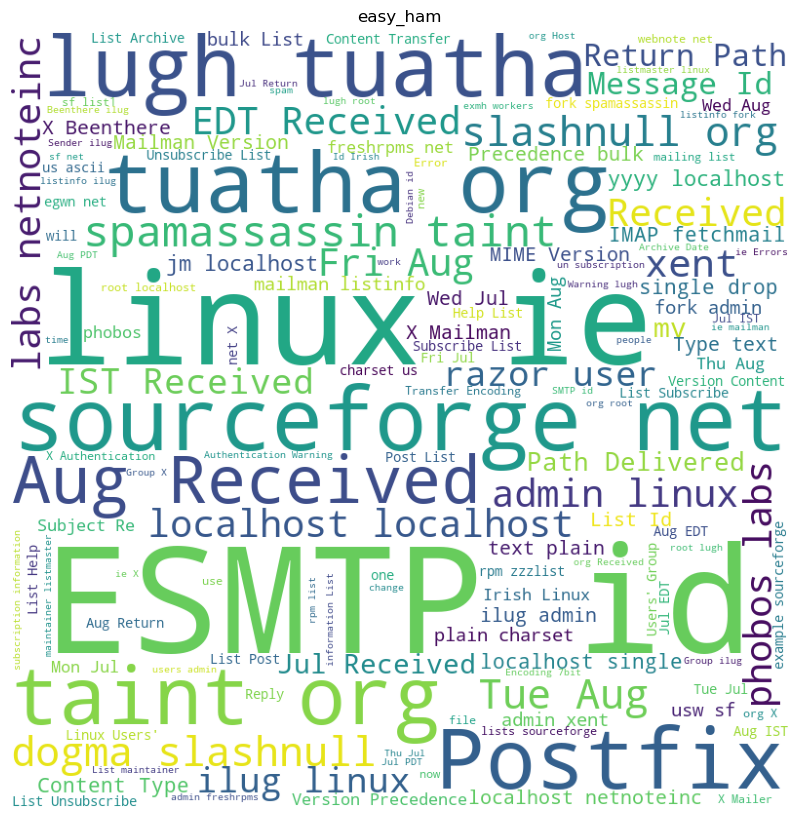

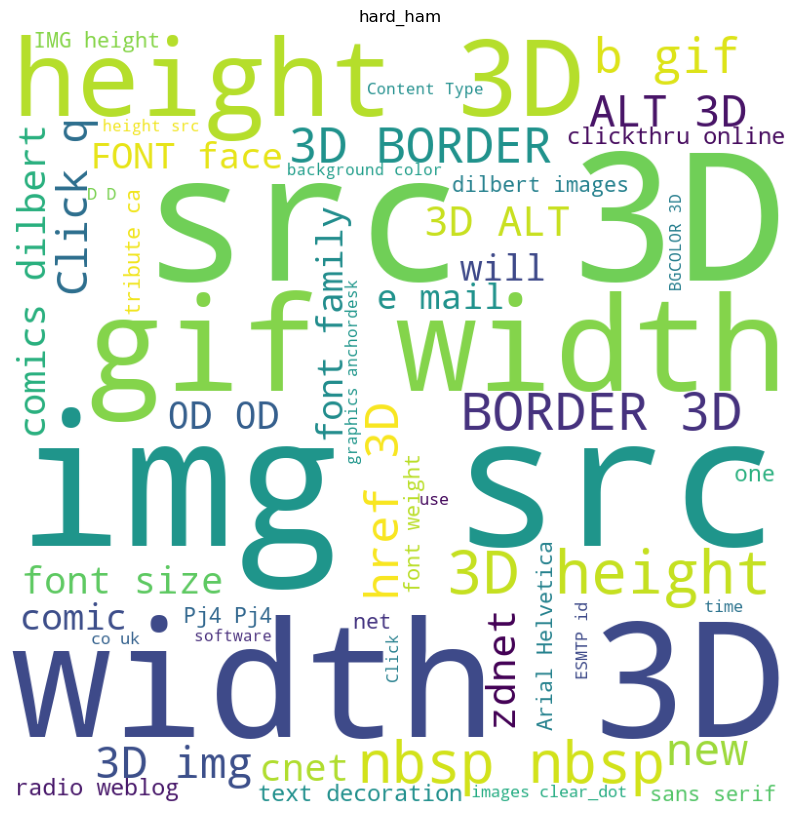

In [4]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# function to extract email body text from html
def extract_email_text(html):
    text = re.sub(r'<.*?>', '', html)
    return text

# path to easy_ham_2 and hard_ham directories
easy_ham_2_path = 'easy_ham_2'
hard_ham_path = 'hard_ham'

# get all files in easy_ham_2 directory
easy_ham_2_files = os.listdir(easy_ham_2_path)

# get all files in hard_ham directory
hard_ham_files = os.listdir(hard_ham_path)

# initialize empty strings for email bodies
easy_ham_2_email_text = ""
hard_ham_email_text = ""

# loop over files in easy_ham_2 directory
for file in easy_ham_2_files:
    with open(os.path.join(easy_ham_2_path, file), 'r', encoding='utf8', errors='ignore') as f:
        email_text = f.read()
    email_body = extract_email_text(email_text)
    easy_ham_2_email_text += email_body

# loop over files in hard_ham directory
for file in hard_ham_files:
    with open(os.path.join(hard_ham_path, file), 'r', encoding='utf8', errors='ignore') as f:
        email_text = f.read()
    email_body = extract_email_text(email_text)
    hard_ham_email_text += email_body

# generate wordcloud for easy_ham_2
easy_ham_2_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(easy_ham_2_email_text) 

# generate wordcloud for hard_ham
hard_ham_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(hard_ham_email_text)

# plot wordcloud for easy_ham_2
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(easy_ham_2_wordcloud) 
plt.axis("off") 
plt.title('easy_ham')
plt.tight_layout(pad = 0) 
  
# plot wordcloud for hard_ham
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(hard_ham_wordcloud) 
plt.axis("off") 
plt.title('hard_ham')
plt.tight_layout(pad = 0) 
  
plt.show() 


### Phish Mail Word Cloud

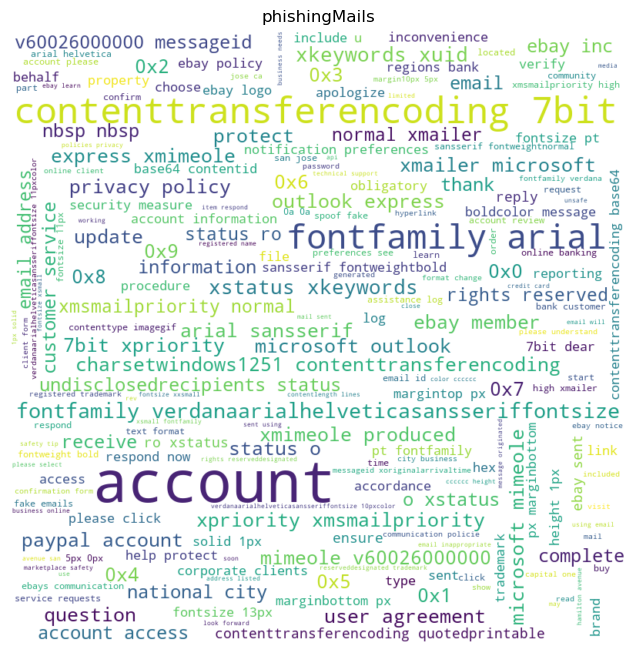

In [7]:
# Path to the phishingMails folder
phish_path = 'phishingMails'

text = ''

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove unwanted characters
    text = re.sub(r'[\r\n\t]+', ' ', text)
    text = re.sub(r'[^\w\s]+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Loop through each email file and extract the email body text
for file in os.listdir(phish_path):
    file_path = os.path.join(phish_path, file)
    with open(file_path, 'r', encoding='latin1') as f:
        lines = f.readlines()
        start_index = None
        for i in range(len(lines)):
            if lines[i].startswith('Content-Type: text/html'):
                start_index = i + 1
                break
        if start_index:
            text += ' '.join(lines[start_index:])
            
# Preprocess the email body text
text = preprocess_text(text)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('phishingMails')
plt.show()


# Root Word Extraction

In [20]:
import os
import email
import pandas as pd
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

stemmer = SnowballStemmer("english")

# function to extract the text from an email file
def extract_email_text(file_path):
    with open(file_path, "rb") as f:
        msg = email.message_from_binary_file(f)
    if msg.is_multipart():
        text_parts = []
        for part in msg.walk():
            if part.get_content_type() == "text/plain":
                text_parts.append(part.get_payload())
        email_text = "".join(text_parts)
    else:
        email_text = msg.get_payload()
    return email_text

# function to extract root words from text
def extract_root_words(text):
    words = text.split()
    root_words = [stemmer.stem(word) for word in words]
    return " ".join(root_words)

# extract root words from easy_ham_2 dataset
easy_ham_2_path = "easy_ham_2"
easy_ham_2_data = []
for root, dirs, files in os.walk(easy_ham_2_path):
    for file in files:
        file_path = os.path.join(root, file)
        email_text = extract_email_text(file_path)
        root_words = extract_root_words(email_text)
        easy_ham_2_data.append(root_words)

# extract root words from hard_ham dataset
hard_ham_path = "hard_ham"
hard_ham_data = []
for root, dirs, files in os.walk(hard_ham_path):
    for file in files:
        file_path = os.path.join(root, file)
        email_text = extract_email_text(file_path)
        root_words = extract_root_words(email_text)
        hard_ham_data.append(root_words)

# extract root words from phishingMails dataset
phishing_path = "phishingMails"
phishing_data = []
eml_files = [file for file in os.listdir(phishing_path) if file.endswith(".eml")]
for file in eml_files:
    file_path = os.path.join(phishing_path, file)
    email_text = extract_email_text(file_path)
    root_words = extract_root_words(email_text)
    phishing_data.append(root_words)


# Frequency Count of Each Root Word

In [25]:
# count the frequency of each root word in the easy_ham_2 dataset
easy_ham_2_vectorizer = CountVectorizer(stop_words="english")
easy_ham_2_counts = easy_ham_2_vectorizer.fit_transform(easy_ham_2_data)
easy_ham_2_word_freq = dict(zip(easy_ham_2_vectorizer.get_feature_names(), easy_ham_2_counts.sum(axis=0).tolist()[0]))
print("Easy ham 2 word frequency:")
print(easy_ham_2_word_freq)

# count the frequency of each root word in the hard_ham dataset
hard_ham_vectorizer = CountVectorizer(stop_words="english")
hard_ham_counts = hard_ham_vectorizer.fit_transform(hard_ham_data)
hard_ham_word_freq = dict(zip(hard_ham_vectorizer.get_feature_names(), hard_ham_counts.sum(axis=0).tolist()[0]))
print("Hard ham word frequency:")
print(hard_ham_word_freq)

# count the frequency of each root word in the phishingMails dataset
phishing_vectorizer = CountVectorizer(stop_words="english")
phishing_counts = phishing_vectorizer.fit_transform(phishing_data)
phishing_word_freq = dict(zip(phishing_vectorizer.get_feature_names(), phishing_counts.sum(axis=0).tolist()[0]))
print("Phishing mail word frequency:")
print(phishing_word_freq)

Easy ham 2 word frequency:
{'00': 210, '000': 60, '0000': 22, '00000000': 1, '00000002': 2, '00000004': 4, '0000014': 1, '00001': 3, '00002': 2, '00003': 2, '00004': 2, '00005': 2, '00006': 2, '00007': 2, '00008': 2, '00009': 2, '0000mo': 2, '00010': 2, '0001015': 3, '000101c231b8': 1, '00011': 2, '0001107': 1, '0001111': 1, '00012': 2, '00013': 2, '00014': 2, '00015': 2, '00016': 2, '00017': 2, '00018': 2, '00019': 2, '0002': 1, '00020': 2, '00021': 2, '00022': 2, '00023': 2, '00024': 2, '000243': 3, '00025': 2, '00026': 2, '00027': 2, '00028': 2, '00029': 2, '00030': 2, '00031': 2, '00032': 2, '000325330181ba8ec268f698f9256626': 2, '00033': 2, '00034': 2, '00035': 2, '00036': 2, '00037': 2, '00038': 2, '00039': 2, '00040': 2, '00041': 2, '00042': 2, '00043': 2, '00044': 2, '00045': 2, '00046': 2, '00047': 2, '00048': 2, '00049': 2, '00050': 2, '00051': 2, '00052': 2, '00053': 2, '00054': 2, '00055': 2, '00056': 2, '00057': 2, '00058': 2, '00059': 2, '00060': 2, '00061': 2, '00062': 2

Hard ham word frequency:
{'00': 260, '000': 113, '0000': 1, '000000': 1635, '0000001': 4, '0000002': 1, '0000004': 1, '0000015': 12, '0000016': 2, '0000018': 1, '0000020': 5, '0000023': 3, '0000035': 1, '0000037': 2, '000066': 6, '00008b': 2, '000099': 8, '0000ff': 57, '0001004': 1, '0001007': 2, '0001010': 1, '0001013': 1, '0001014': 1, '0001019': 4, '0001021': 1, '0001048': 1, '0001061': 1, '0001081': 1, '0001103': 1, '0001107': 1, '0001111': 2, '0001114': 1, '0001120': 1, '0001138': 1, '0001141': 1, '0001172': 1, '0001189': 1, '0001196': 1, '0001215': 1, '0001236': 1, '0001237': 1, '0001282': 1, '0001285': 3, '0001293': 1, '0001294': 2, '0001312': 1, '0001314': 1, '0001319': 1, '0001330': 2, '0001332': 1, '0001349': 1, '0001381': 1, '0001399': 1, '0001424': 1, '0001428': 2, '0001429': 1, '0001433': 1, '0001444': 1, '0001452': 1, '0001454': 1, '0001455': 1, '0001490': 1, '0001508': 1, '0001517': 1, '000152': 2, '0001523': 2, '0001532': 1, '0001542': 1, '0001549': 2, '000155': 1, '000

Phishing mail word frequency:
{'00': 159, '000': 92, '0000': 4, '000000': 1555, '0000000308001': 3, '000008': 1, '000066': 215, '00007f': 30, '000080': 9, '000099': 19, '0000cc': 28, '0000ff': 166, '0001': 1, '0001193125': 2, '0001pt': 69, '00084740000484800938': 5, '000asdxni': 1, '0011': 1, '0012': 2, '001608': 1, '001_logo_content': 2, '002': 7, '0024': 2, '0030': 2, '00302173213': 5, '0033': 5, '003333': 1, '003366': 559, '00336a': 22, '00339': 2, '003399': 1061, '0033cc': 6, '0034': 1, '0037': 1, '003b6f': 8, '0044': 1, '004c4d': 10, '004f4f': 16, '005': 1, '006': 3, '0060558121': 2, '0064310': 3, '006600': 6, '006633': 2, '006666': 5, '006699': 68, '0066cc': 197, '0066ff': 1, '0067': 2, '007318_g57116stamp15': 2, '008000': 3, '008080': 4, '0080c0': 2, '0081': 7, '00937614': 4, '0098cf': 4, '0099ff': 1, '00a8dc': 12, '00aa00': 3, '00aec5': 7, '00ccff': 4, '00f': 28, '00ff00': 1, '00usd': 1, '00z': 46, '01': 145, '0100': 14, '010206115': 6, '01114601006': 5, '0112': 2, '0179': 2, '

# Ploting Bar Chart of 20 Frequent Word

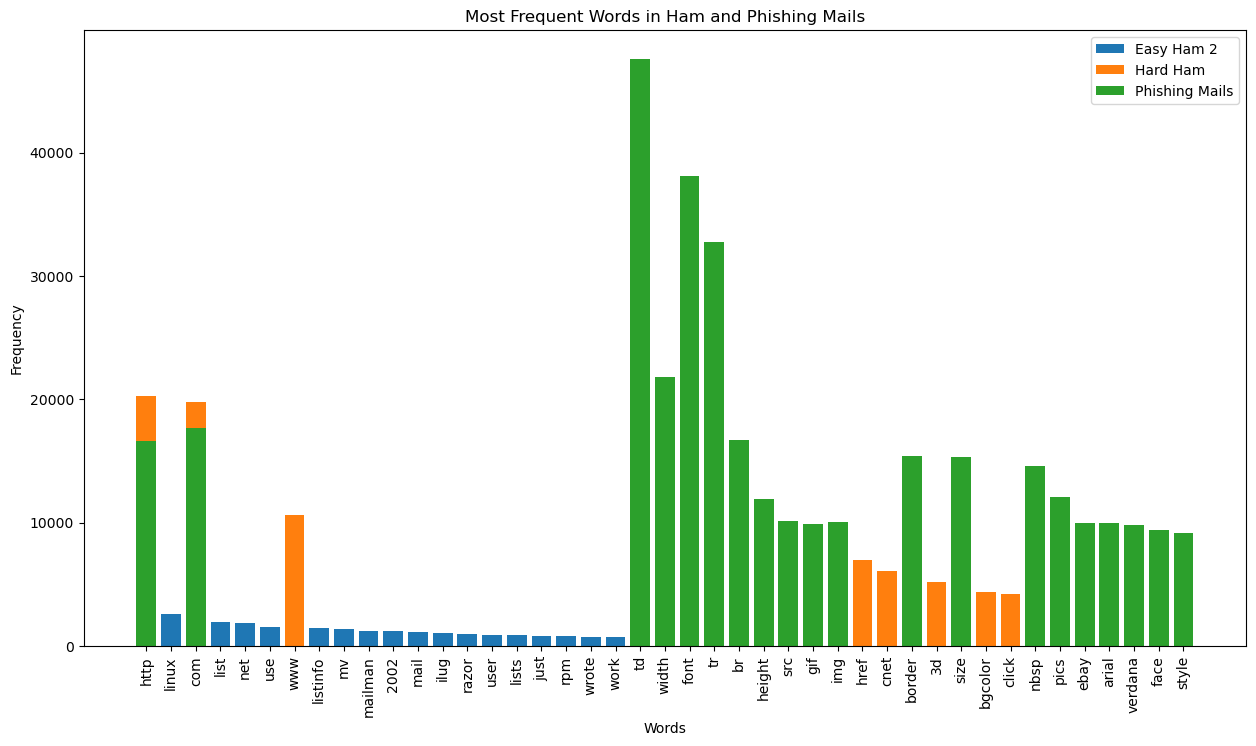

In [26]:
import matplotlib.pyplot as plt

# get the top 20 most frequent words in easy_ham_2 dataset
easy_ham_2_word_freq_sorted = sorted(easy_ham_2_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
easy_ham_2_words = [word[0] for word in easy_ham_2_word_freq_sorted]
easy_ham_2_freqs = [word[1] for word in easy_ham_2_word_freq_sorted]

# get the top 20 most frequent words in hard_ham dataset
hard_ham_word_freq_sorted = sorted(hard_ham_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
hard_ham_words = [word[0] for word in hard_ham_word_freq_sorted]
hard_ham_freqs = [word[1] for word in hard_ham_word_freq_sorted]

# get the top 20 most frequent words in phishingMails dataset
phishing_word_freq_sorted = sorted(phishing_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
phishing_words = [word[0] for word in phishing_word_freq_sorted]
phishing_freqs = [word[1] for word in phishing_word_freq_sorted]

# create a bar chart to visualize the word frequencies
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(easy_ham_2_words, easy_ham_2_freqs, label="Easy Ham 2")
ax.bar(hard_ham_words, hard_ham_freqs, label="Hard Ham")
ax.bar(phishing_words, phishing_freqs, label="Phishing Mails")
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.set_title("Most Frequent Words in Ham and Phishing Mails")
ax.legend()
plt.xticks(rotation=90)
plt.show()


In [18]:
pip install numpy --upgrade

     ---------------------------------------- 14.9/14.9 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


# Text classification using Support Vector Machine

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
data = []
target = []

for folder_name in ['easy_ham_2', 'hard_ham', 'phishingMails']:
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            data.append(f.read())
        if folder_name == 'phishingMails':
            target.append(1)
        else:
            target.append(0)

# Convert the target data to numpy arrays
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Convert text data to feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Build the SVM classifier
classifier = SVC()

# Train the SVM classifier
classifier.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print('Metric\t\tValue')
print('Accuracy\t{:.6f}'.format(accuracy))
print('Precision\t{:.6f}'.format(precision))
print('Recall\t\t{:.6f}'.format(recall))
print('F1-score\t{:.6f}'.format(f1))
print('ROC AUC\t\t{:.6f}'.format(roc_auc))
print(classification_report(y_test, y_pred))

Metric		Value
Accuracy	0.997429
Precision	0.997680
Recall		0.997680
F1-score	0.997680
ROC AUC		0.997399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       431

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778



# Text classification using Logistic Regression

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
data = []
target = []

for folder_name in ['easy_ham_2', 'hard_ham', 'phishingMails']:
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            data.append(f.read())
        if folder_name == 'phishingMails':
            target.append(1)
        else:
            target.append(0)

# Convert the target data to numpy arrays
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Convert text data to feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Build the Logistic Regression classifier
classifier = LogisticRegression()

# Train the Logistic Regression classifier
classifier.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print('Metric\t\tValue')
print('Accuracy\t{:.6f}'.format(accuracy))
print('Precision\t{:.6f}'.format(precision))
print('Recall\t\t{:.6f}'.format(recall))
print('F1-score\t{:.6f}'.format(f1))
print('ROC AUC\t\t{:.6f}'.format(roc_auc))
print(classification_report(y_test, y_pred))

Metric		Value
Accuracy	0.992288
Precision	0.988506
Recall		0.997680
F1-score	0.993072
ROC AUC		0.991635
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       347
           1       0.99      1.00      0.99       431

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778



# Text classification using Random Forest Classifier

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Load the data
data = []
target = []

for folder_name in ['easy_ham_2', 'hard_ham', 'phishingMails']:
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            data.append(f.read())
        if folder_name == 'phishingMails':
            target.append(1)
        else:
            target.append(0)

# Convert the target data to numpy arrays
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Convert text data to feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Build the Random Forest Classifier
classifier = RandomForestClassifier()

# Train the Random Forest Classifier
classifier.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print('Metric\t\tValue')
print('Accuracy\t{:.6f}'.format(accuracy))
print('Precision\t{:.6f}'.format(precision))
print('Recall\t\t{:.6f}'.format(recall))
print('F1-score\t{:.6f}'.format(f1))
print('ROC AUC\t\t{:.6f}'.format(roc_auc))
print(classification_report(y_test, y_pred))


Metric		Value
Accuracy	0.997429
Precision	0.997680
Recall		0.997680
F1-score	0.997680
ROC AUC		0.997399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       431

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778



# Text classification using Decision Tree Classifier

In [2]:
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
data = []
target = []

for folder_name in ['easy_ham_2', 'hard_ham', 'phishingMails']:
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            data.append(f.read())
        if folder_name == 'phishingMails':
            target.append(1)
        else:
            target.append(0)

# Convert the target data to numpy arrays
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Convert text data to feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Build the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
classifier.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print('Metric\t\tValue')
print('Accuracy\t{:.6f}'.format(accuracy))
print('Precision\t{:.6f}'.format(precision))
print('Recall\t\t{:.6f}'.format(recall))
print('F1-score\t{:.6f}'.format(f1))
print('ROC AUC\t\t{:.6f}'.format(roc_auc))
print(classification_report(y_test, y_pred))


Metric		Value
Accuracy	0.998715
Precision	1.000000
Recall		0.997680
F1-score	0.998839
ROC AUC		0.998840
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       431

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778



# Text classification using Naive Bayes Classifier

In [4]:
import os
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
data = []
target = []

for folder_name in ['easy_ham_2', 'hard_ham', 'phishingMails']:
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            data.append(f.read())
        if folder_name == 'phishingMails':
            target.append(1)
        else:
            target.append(0)

# Convert the target data to numpy arrays
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Convert text data to feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Build the Naive Bayes Classifier
classifier = MultinomialNB()

# Train the Naive Bayes Classifier
classifier.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print('Metric\t\tValue')
print('Accuracy\t{:.6f}'.format(accuracy))
print('Precision\t{:.6f}'.format(precision))
print('Recall\t\t{:.6f}'.format(recall))
print('F1-score\t{:.6f}'.format(f1))
print('ROC AUC\t\t{:.6f}'.format(roc_auc))
print(classification_report(y_test, y_pred))


Metric		Value
Accuracy	0.958869
Precision	0.932755
Recall		0.997680
F1-score	0.964126
ROC AUC		0.954171
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       347
           1       0.93      1.00      0.96       431

    accuracy                           0.96       778
   macro avg       0.96      0.95      0.96       778
weighted avg       0.96      0.96      0.96       778



# Text classification using a Neural Network model

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load the data
data = []
target = []

for folder_name in ['easy_ham_2', 'hard_ham', 'phishingMails']:
    for filename in os.listdir(folder_name):
        filepath = os.path.join(folder_name, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            data.append(f.read())
        if folder_name == 'phishingMails':
            target.append(1)
        else:
            target.append(0)

# Convert the target data to numpy arrays
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build the neural network
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_len),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Predict the target values of the test set
y_pred = model.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print('Metric\t\tValue')
print('Accuracy\t{:.6f}'.format(accuracy))
print('Precision\t{:.6f}'.format(precision))
print('Recall\t\t{:.6f}'.format(recall))
print('F1-score\t{:.6f}'.format(f1))
print('ROC AUC\t\t{:.6f}'.format(roc_auc))
print(classification_report(y_test, y_pred))


Epoch 1/10
98/98 [==============================] - 4s 11ms/step - loss: 0.3004 - accuracy: 0.9267 - val_loss: 0.0391 - val_accuracy: 0.9936
Epoch 2/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0187 - accuracy: 0.9965 - val_loss: 0.0192 - val_accuracy: 0.9936
Epoch 3/10
98/98 [==============================] - 1s 8ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.0174 - val_accuracy: 0.9923
Epoch 4/10
98/98 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9923
Epoch 5/10
98/98 [==============================] - 1s 7ms/step - loss: 8.6393e-04 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9923
Epoch 6/10
98/98 [==============================] - 1s 7ms/step - loss: 5.5480e-04 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9923
Epoch 7/10
98/98 [==============================] - 1s 8ms/step - loss: 3.9356e-04 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9923
Epoch 8

# URL Part

In [41]:
import os
import re
from tldextract import extract
import csv

# Define function to extract domain from a URL
def get_domain(url):
    return extract(url).registered_domain

# Create set to store unique URLs and their labels
unique_urls = set()

# Loop through files in phishingMails folder and label as "Phish"
folder_path = "phishingMails/"
for file in os.listdir(folder_path):
    file_path = folder_path + file
    with open(file_path, "r", encoding="latin-1") as f:
        for line in f:
            # Find all URLs in the line
            urls = re.findall("(?P<url>https?://[^\s]+)", line)
            # Add each URL and its label to unique_urls set
            for url in urls:
                unique_urls.add((url, "Phish"))

# Loop through files in easy_ham_2 and hard_ham folders and label as "Ham"
ham_folders = ["easy_ham_2/", "hard_ham/"]
for folder_path in ham_folders:
    for file in os.listdir(folder_path):
        file_path = folder_path + file
        with open(file_path, "r", encoding="latin-1") as f:
            for line in f:
                # Find all URLs in the line
                urls = re.findall("(?P<url>https?://[^\s]+)", line)
                # Add each URL and its label to unique_urls set
                for url in urls:
                    unique_urls.add((url, "Ham"))

# Write unique URLs and their labels to url.csv file
with open("url.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["URL", "Label"])
    for url, label in unique_urls:
        writer.writerow([url, label])


In [44]:
import pandas as pd

df = pd.read_csv('url.csv')

df.head(101)

,URL,Label
0,http://clickthru.online.com/Click?q=2b-2FVYINz...,Ham
1,http://shopper.cnet.com/i/co/ps/120/9062023_12...,Ham
2,http://www.canoe.ca/NationalTicker/CANOE-wire....,Ham
3,http://www.lindows.com/products>,Ham
4,http://clickthru.online.com/Click?q=e3-ze2WQkV...,Ham
...,...,...
96,http://swansgrove.blogspot.com/,Ham
97,http://www.theregister.co.uk/content/4/26118.html,Ham
98,http://www.theregister.co.uk/content/4/26188.html,Ham
99,http://210.245.166.85/cgibin128ssl/eBayISAPIdl...,Phish


# URL classification using Support Vector Machine

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Support Vector Machine classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Support:', support)
print('ROC AUC:', auc_roc)

Accuracy: 0.976009362200117
Precision: 0.9832347140039448
Recall: 0.9387947269303202
F1-score: 0.9605009633911369
Support: 3418
ROC AUC: 0.9657895536179614


# URL classification using Logistic Regression

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Support:', support)
print('ROC AUC:', auc_roc)


Accuracy: 0.9733762434172031
Precision: 0.9879396984924623
Recall: 0.9256120527306968
F1-score: 0.9557608167233835
Support: 3418
ROC AUC: 0.9602593370614434


# URL classification using Random Forest Classifier

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Support:', support)
print('ROC AUC:', auc_roc)


Accuracy: 0.9727911059098888
Precision: 0.9708454810495627
Recall: 0.940677966101695
F1-score: 0.9555236728837877
Support: 3418
ROC AUC: 0.9639722597910853


# URL classification using Decision Tree

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Support:', support)
print('ROC AUC:', auc_roc)


Accuracy: 0.9713282621416033
Precision: 0.9716242661448141
Recall: 0.9350282485875706
F1-score: 0.9529750479846449
Support: 3418
ROC AUC: 0.9613596251426817


# URL classification using Naive Bayes

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Support:', support)
print('ROC AUC:', auc_roc)


Accuracy: 0.9733762434172031
Precision: 0.965484180249281
Recall: 0.948210922787194
F1-score: 0.9567695961995248
Support: 3418
ROC AUC: 0.9664653934818822


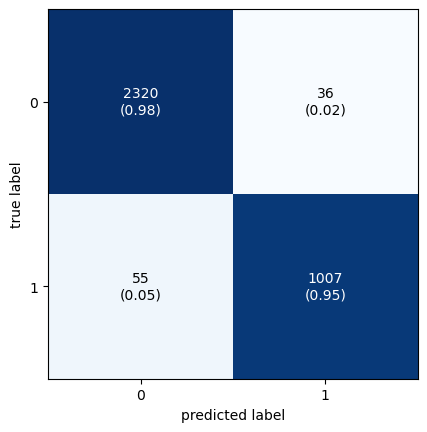

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_normed=True)
plt.show()


# URL classification using Neural Network

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier 
#MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load data from url.csv
df = pd.read_csv('url.csv')

# Map string labels to numeric labels
label_map = {'Ham': 0, 'Phish': 1}
df['Label'] = df['Label'].map(label_map)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Label'], test_size=0.2, random_state=42)

# Convert URLs to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Neural Network classifier
classifier = MLPClassifier()
classifier.fit(X_train, y_train)

# Predict labels for testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = len(y_test)
auc_roc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Support:', support)
print('ROC AUC:', auc_roc)

Accuracy: 0.9789350497366881
Precision: 0.9759615384615384
Recall: 0.955743879472693
F1-score: 0.9657469077069458
Support: 3418
ROC AUC: 0.9725663370198778


In [4]:
import pickle

# Save trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)


References

[1] https://blog.keras.io/building-autoencoders-in-keras.html

[2] https://en.wikipedia.org/wiki/Autoencoder

[3] https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/

[4] https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/
